In [488]:
# Autor: Miguel Moreno Sánchez
# Fecha: 13-1-2025
# ID: 23900110M --> 239001105 --> 39222225 (semilla)

In [490]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

# Se siguen las intrucciones de la actividad para asignar valores a los siguientes parámetros:
semilla = [3,9,2,2,2,2,2,5]
n_samples = 200 + 10*semilla[0]
n_features = 10 + semilla[1] + semilla[2]
n_informative = 10 + semilla[1]
bias = 2
noise = 10*semilla[3]
random_state = 3922225
shuffle = False

# 1) ¿Qué significa cada uno de los parámetros de entrada en la función make_regression usados para crear el dataset?

# La función make_regression genera un problema aleatorio de regresión múltiple. Se deben pasar una serie de argumentos:
# n_samples: Número de muestras.
# n_features: Tamaño (número de elementos) de cada muestra. Cada elemento corresponde a un resultado de cada variable predictora. Por lo tanto,
# n_features es el número de variables predictoras del modelo.
# n_informative: Número de elementos empleados para construir el modelo de regresión. Nótese que este número es siempre menor que el número de 
# elementos en cada muestra por construcción.
# n_targets: Número de variables respuesta. El valor por defecto es 1.
# bias: Sesgo
# noise: Desviación estándar gaussiana aplicada a la variable respuesta.
# coef: Variable booleana. Si es True, se devuelven los coeficientes del módelo de regresión.
# random_state: Semilla con la que iniciar la generación de números aleatorios empleados en la construcción del dataset.
x, y, coefs = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, bias=bias, noise=noise,
                              random_state=random_state, shuffle=shuffle, coef=True)

print('Hay ', n_features, ' variables predictoras. Sus respectivos coeficientes son:')
print(coefs)

Hay  21  variables predictoras. Sus respectivos coeficientes son:
[64.59926724 87.89663806 67.08245831 75.00381832 25.49929161 15.16932081
 57.93542868 55.28603996 89.02750439 33.20655908 50.89682071  1.84790789
 93.21931133 52.16789289 49.9057296  96.13672029 24.8190293  68.1918696
 56.52604379  0.          0.        ]


In [494]:
print('El modelo de regresión lineal múltiple es:')
modelo = ''
for i in range(len(coefs)-1):
    modelo += str(round(coefs[i],2))+'*'+'X'+str(i)+' + '
modelo += str(round(coefs[-1],2))+'*'+'X'+str(len(coefs)-1)
print('Y = intercepto +',modelo)

El modelo de regresión lineal múltiple es:
Y = intercepto + 64.6*X0 + 87.9*X1 + 67.08*X2 + 75.0*X3 + 25.5*X4 + 15.17*X5 + 57.94*X6 + 55.29*X7 + 89.03*X8 + 33.21*X9 + 50.9*X10 + 1.85*X11 + 93.22*X12 + 52.17*X13 + 49.91*X14 + 96.14*X15 + 24.82*X16 + 68.19*X17 + 56.53*X18 + 0.0*X19 + 0.0*X20


In [496]:
# 2) Describe el conjunto de datos y obtén un análisis gráfico de todas las variables (predictoras y respuesta)

# Se comienza guardando el dataset en un dataframe del módulo pandas. Para ello se crea un diccionario auxiliar previamente. Se ha de tener en cuenta
# que 'x' es un array de arrays, es decir una matriz, para la que cada fila corresponde a las observaciones de cada variable predictora. En este caso,
# como hay 21 variables predictoras, son 21 las filas de la matriz. Para almacenar la información en un dataframe, conviene trasponer la matriz y así
# tener tantas columnas como variables predictoras.
xt = x.transpose() # Matriz traspuesta
dic = {'X'+str(i):xt[i] for i in range(len(coefs))}
dic['Y'] = y # Se añade la variable respuesta
dataset = pd.DataFrame(dic)
dataset.head(8) # Se muestran las 8 primeras filas del dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.644526,0.114781,0.368940,-1.229731,0.692563,0.404388,-0.568553,-0.908428,-3.292856,0.173747,...,-1.303287,0.727329,0.575871,-0.728358,0.009437,0.231699,-0.430183,0.281972,1.400909,-475.862749
1,-1.145844,0.200907,-0.436405,-2.519338,0.989293,0.247814,1.347361,1.125531,-0.000973,0.489578,...,-1.135448,0.167806,-0.010790,-0.751456,-0.233650,-0.402584,0.245856,0.278058,-1.935464,-264.677787
2,1.006760,-0.619001,0.325830,-2.422803,0.853629,0.510411,0.647400,1.281961,-0.406290,0.682060,...,-0.622640,1.051669,-0.859777,-0.094571,-1.352382,-0.759064,0.503666,-0.672687,0.414021,-90.989061
3,2.334429,-1.382760,0.874432,-1.697937,1.136898,0.628195,-0.312072,0.210365,0.619847,1.547965,...,-1.261265,1.220696,-0.700250,0.459670,0.907921,1.218958,-2.309726,0.429820,-0.651443,52.929820
4,-0.699450,0.182375,0.916060,-0.994266,-0.840409,-2.194632,-2.038295,0.180935,1.431110,-0.637909,...,2.250199,-0.228149,-0.724159,0.657941,0.041131,-0.496436,0.512584,0.654902,1.530095,123.012794
5,-1.311158,-1.623724,-0.378424,0.853891,-1.278686,1.213791,-1.217255,0.410977,1.617020,-1.188646,...,1.212162,0.024944,0.915276,-1.245150,0.875346,1.109903,0.012482,0.413250,-0.522180,-49.104531
6,-0.877908,0.966256,0.258121,-0.521206,0.445709,-1.325778,-0.791484,0.635523,-2.120132,-0.770032,...,-1.220638,-0.870504,1.458919,-0.833393,1.771275,-0.405725,-0.653360,2.004342,0.190718,-426.056483
7,0.306910,0.241057,-1.360927,1.154541,0.707651,-1.929103,1.594779,1.166457,1.442366,-0.081561,...,-1.296650,-0.666081,-0.157538,0.089638,0.622701,-0.605540,1.420916,-1.315122,0.744559,333.323673


In [498]:
dataset.tail(8) # Se muestran las 8 últimas filas del dataframe

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
222,1.114029,-1.943643,-0.267968,-0.158582,1.980505,-1.333502,-1.199422,-0.726354,0.339212,-1.985976,...,0.582832,0.102750,0.253018,-0.687119,0.905839,0.019603,1.048390,-1.202171,-0.313846,-80.129016
223,0.581850,0.910071,0.006270,-1.124968,0.610058,0.191607,0.448344,-0.459703,-0.939275,-0.576722,...,-0.055678,1.509719,-0.144897,0.250274,-0.165445,0.875724,0.003944,-1.064461,-1.856960,90.357063
224,-0.363721,-0.876811,-1.416743,-2.069518,0.327633,0.281366,-1.888457,0.122247,-0.159552,1.491021,...,-0.204733,0.565885,-0.357432,0.170807,0.734713,1.251023,-0.094474,0.196550,-0.366246,-251.421987
225,0.225103,-0.277676,1.916609,0.491045,-0.796079,-1.746464,0.903188,-0.925483,0.806078,1.446513,...,-0.469509,-0.940005,-0.044746,-0.038340,-0.285392,-1.274743,1.466684,-0.220340,-0.982568,166.545865
226,-1.331070,-1.295491,0.041000,0.424640,-0.164994,-0.911619,-0.190308,0.771682,0.683629,0.746315,...,0.302021,-0.576216,0.565547,-0.551281,-0.039328,0.901347,-0.641953,-0.405378,0.495019,-69.265675
227,-0.323121,1.064348,-1.054293,-0.255518,0.174622,0.443125,-0.606957,0.265285,-1.336404,0.494557,...,1.419828,0.615079,1.165833,-1.064838,-1.885814,-1.493203,1.204028,-0.724293,1.084684,-154.602579
228,0.208948,0.483015,-1.307156,-0.525071,-0.504676,0.991966,-0.953228,-0.324008,0.961471,1.057759,...,-1.398130,0.135309,0.635432,1.599927,-0.167733,-0.889111,0.554846,-0.326776,-1.030781,-58.851041
229,-0.683475,-1.134872,-0.073393,-2.198539,-0.805013,1.517722,-0.933293,-0.137953,-0.729416,1.186737,...,0.649313,-1.165116,-0.170192,0.792287,1.593489,-0.313088,-1.313033,-1.071351,0.284912,-390.197704


In [500]:
# Una vez creado el dataframe, se procede a describir el conjunto de datos contenido en él.

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      230 non-null    float64
 1   X1      230 non-null    float64
 2   X2      230 non-null    float64
 3   X3      230 non-null    float64
 4   X4      230 non-null    float64
 5   X5      230 non-null    float64
 6   X6      230 non-null    float64
 7   X7      230 non-null    float64
 8   X8      230 non-null    float64
 9   X9      230 non-null    float64
 10  X10     230 non-null    float64
 11  X11     230 non-null    float64
 12  X12     230 non-null    float64
 13  X13     230 non-null    float64
 14  X14     230 non-null    float64
 15  X15     230 non-null    float64
 16  X16     230 non-null    float64
 17  X17     230 non-null    float64
 18  X18     230 non-null    float64
 19  X19     230 non-null    float64
 20  X20     230 non-null    float64
 21  Y       230 non-null    float64
dtypes:

In [502]:
# Se observa que se tienen 230 observaciones para cada una de las 21 variables predictoras y la variable respuesta y que todas son variables numéricas.
# Se obtiene información estadística del conjunto de datos empleando el método 'describe'.

print(dataset.describe())

               X0          X1          X2          X3          X4          X5  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean    -0.073013   -0.018110   -0.078810   -0.063439    0.029141   -0.092567   
std      0.972736    0.980411    0.990860    1.091465    0.966080    1.048133   
min     -3.291593   -2.183792   -2.699989   -2.928918   -2.353780   -2.383809   
25%     -0.722694   -0.662575   -0.775238   -0.856530   -0.713626   -0.756419   
50%     -0.043611   -0.052454   -0.143945   -0.022600    0.074204    0.019472   
75%      0.625460    0.662876    0.603192    0.720034    0.646442    0.648075   
max      2.657510    2.469123    2.587076    3.308359    2.456286    2.473195   

               X6          X7          X8          X9  ...         X12  \
count  230.000000  230.000000  230.000000  230.000000  ...  230.000000   
mean     0.029184   -0.040717    0.010178   -0.004987  ...   -0.021329   
std      0.988359    0.992352    1.017750    1.0

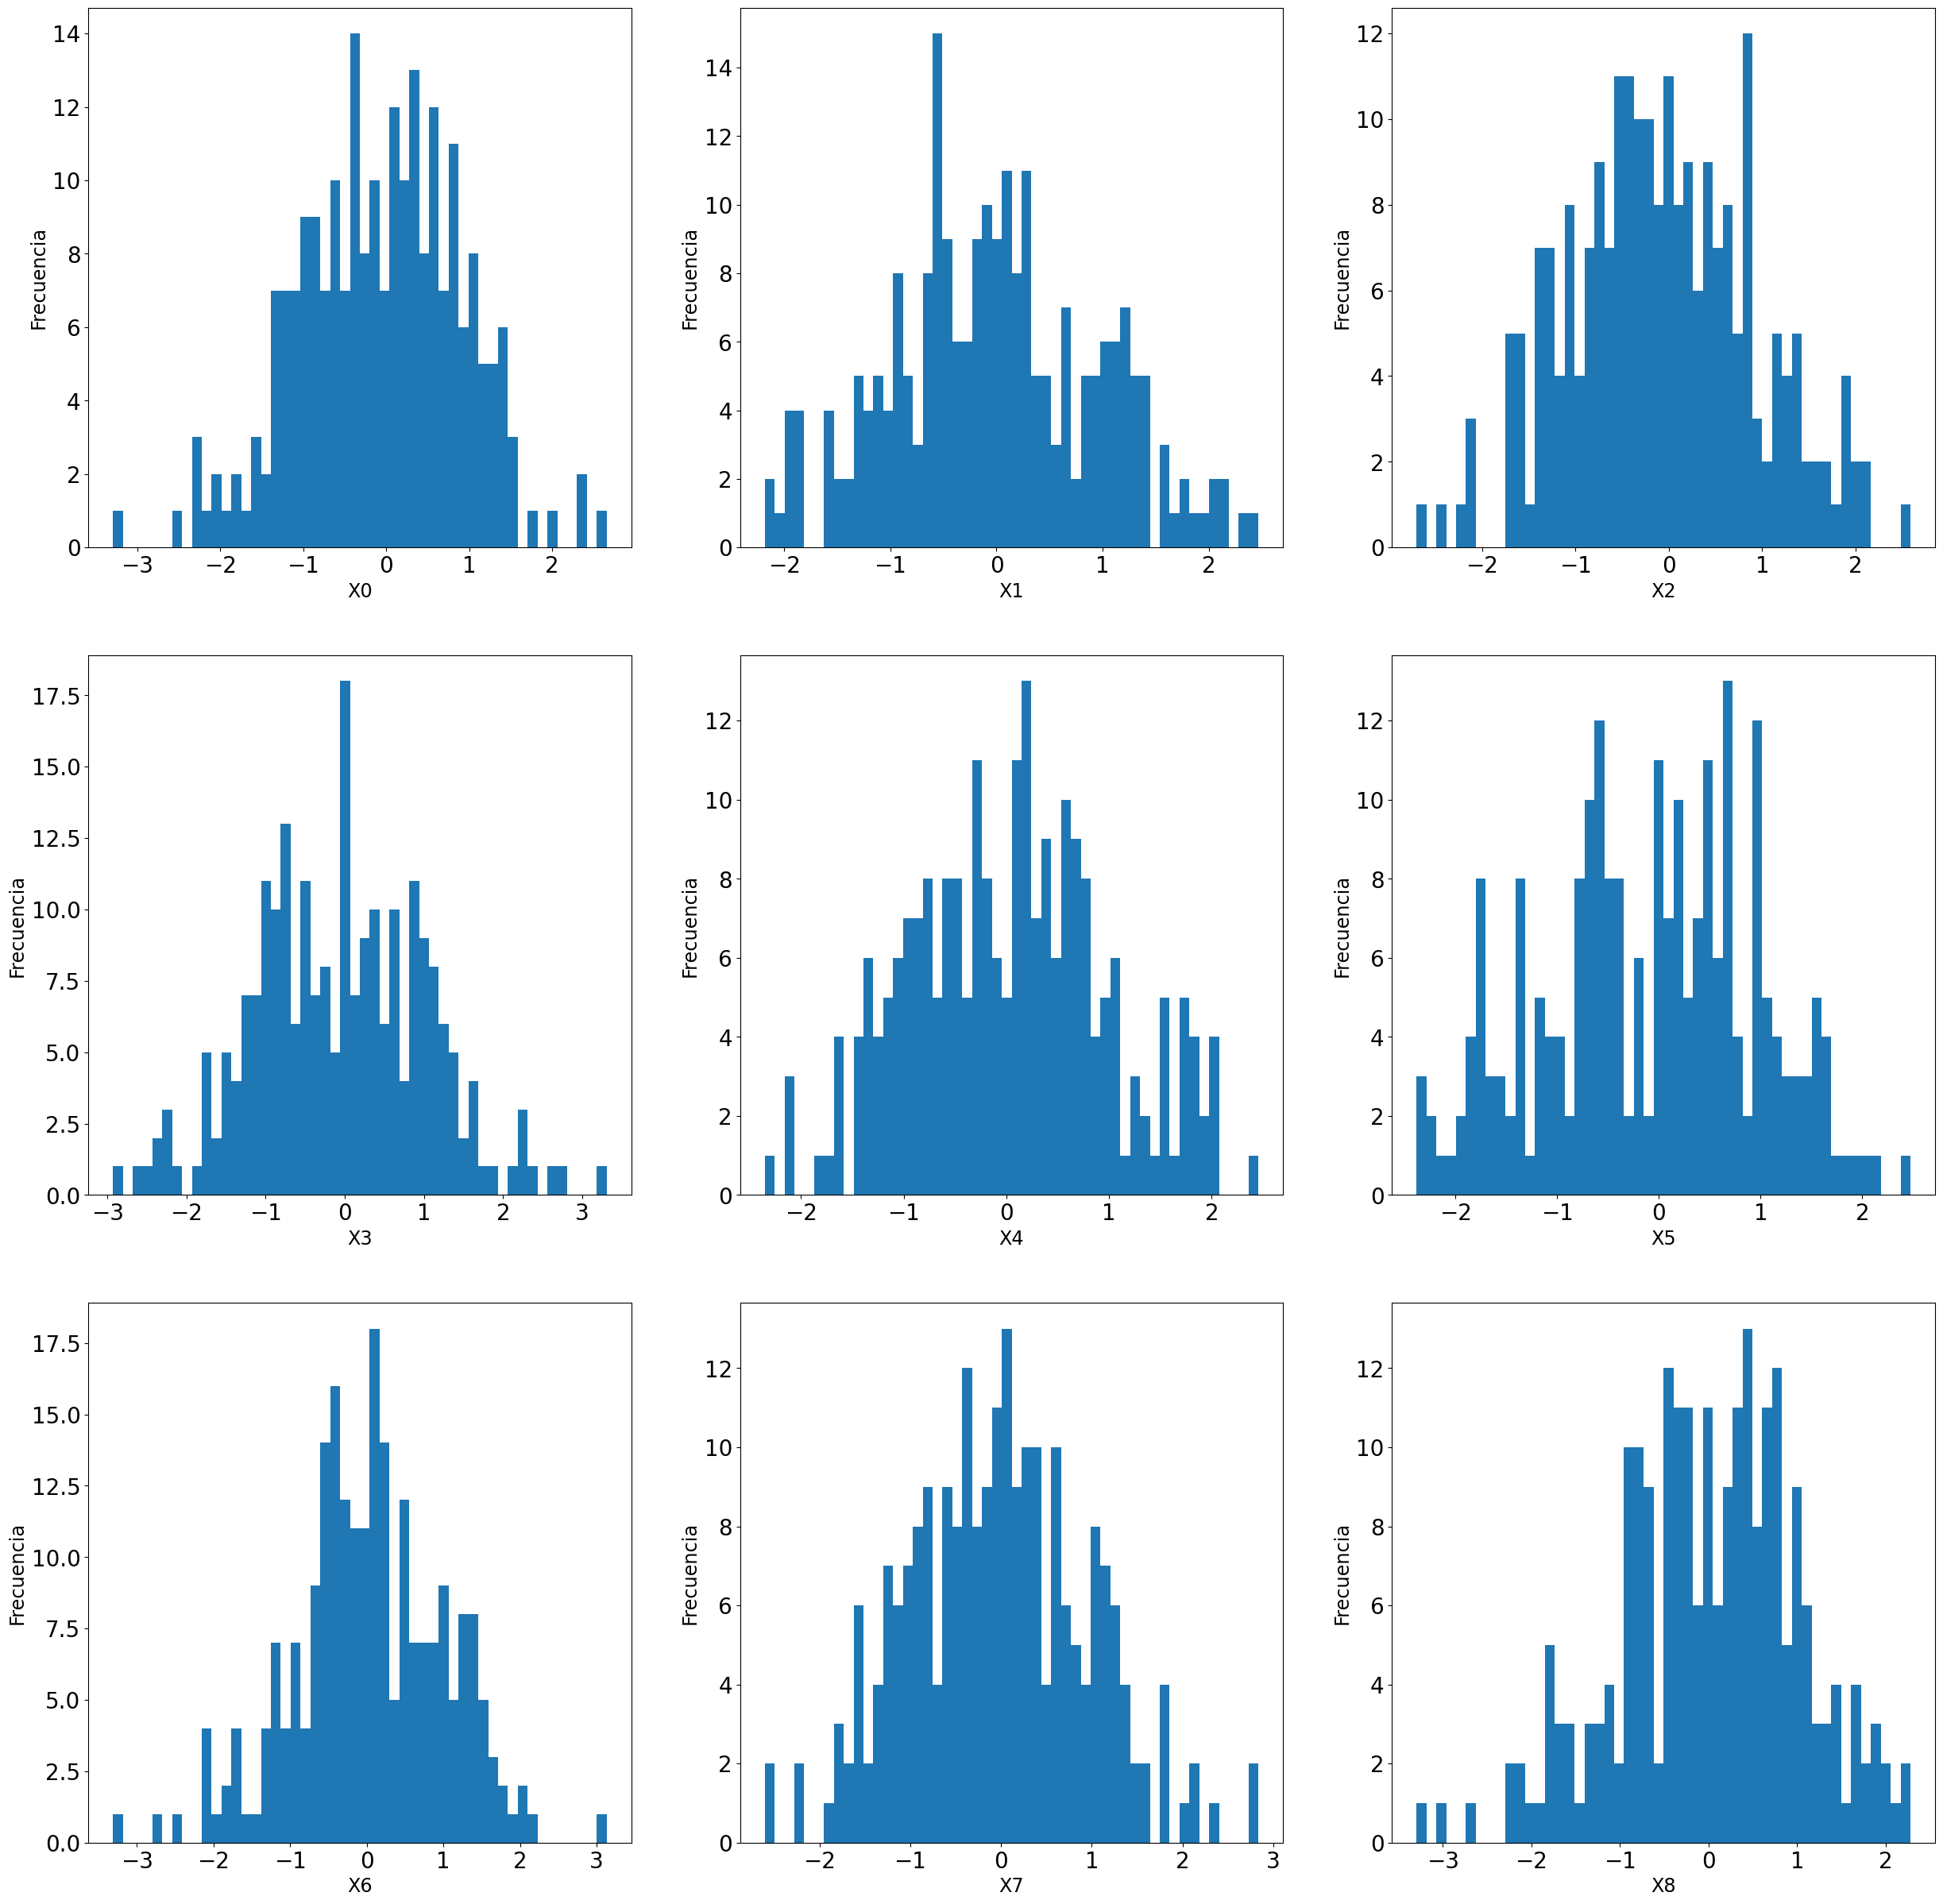

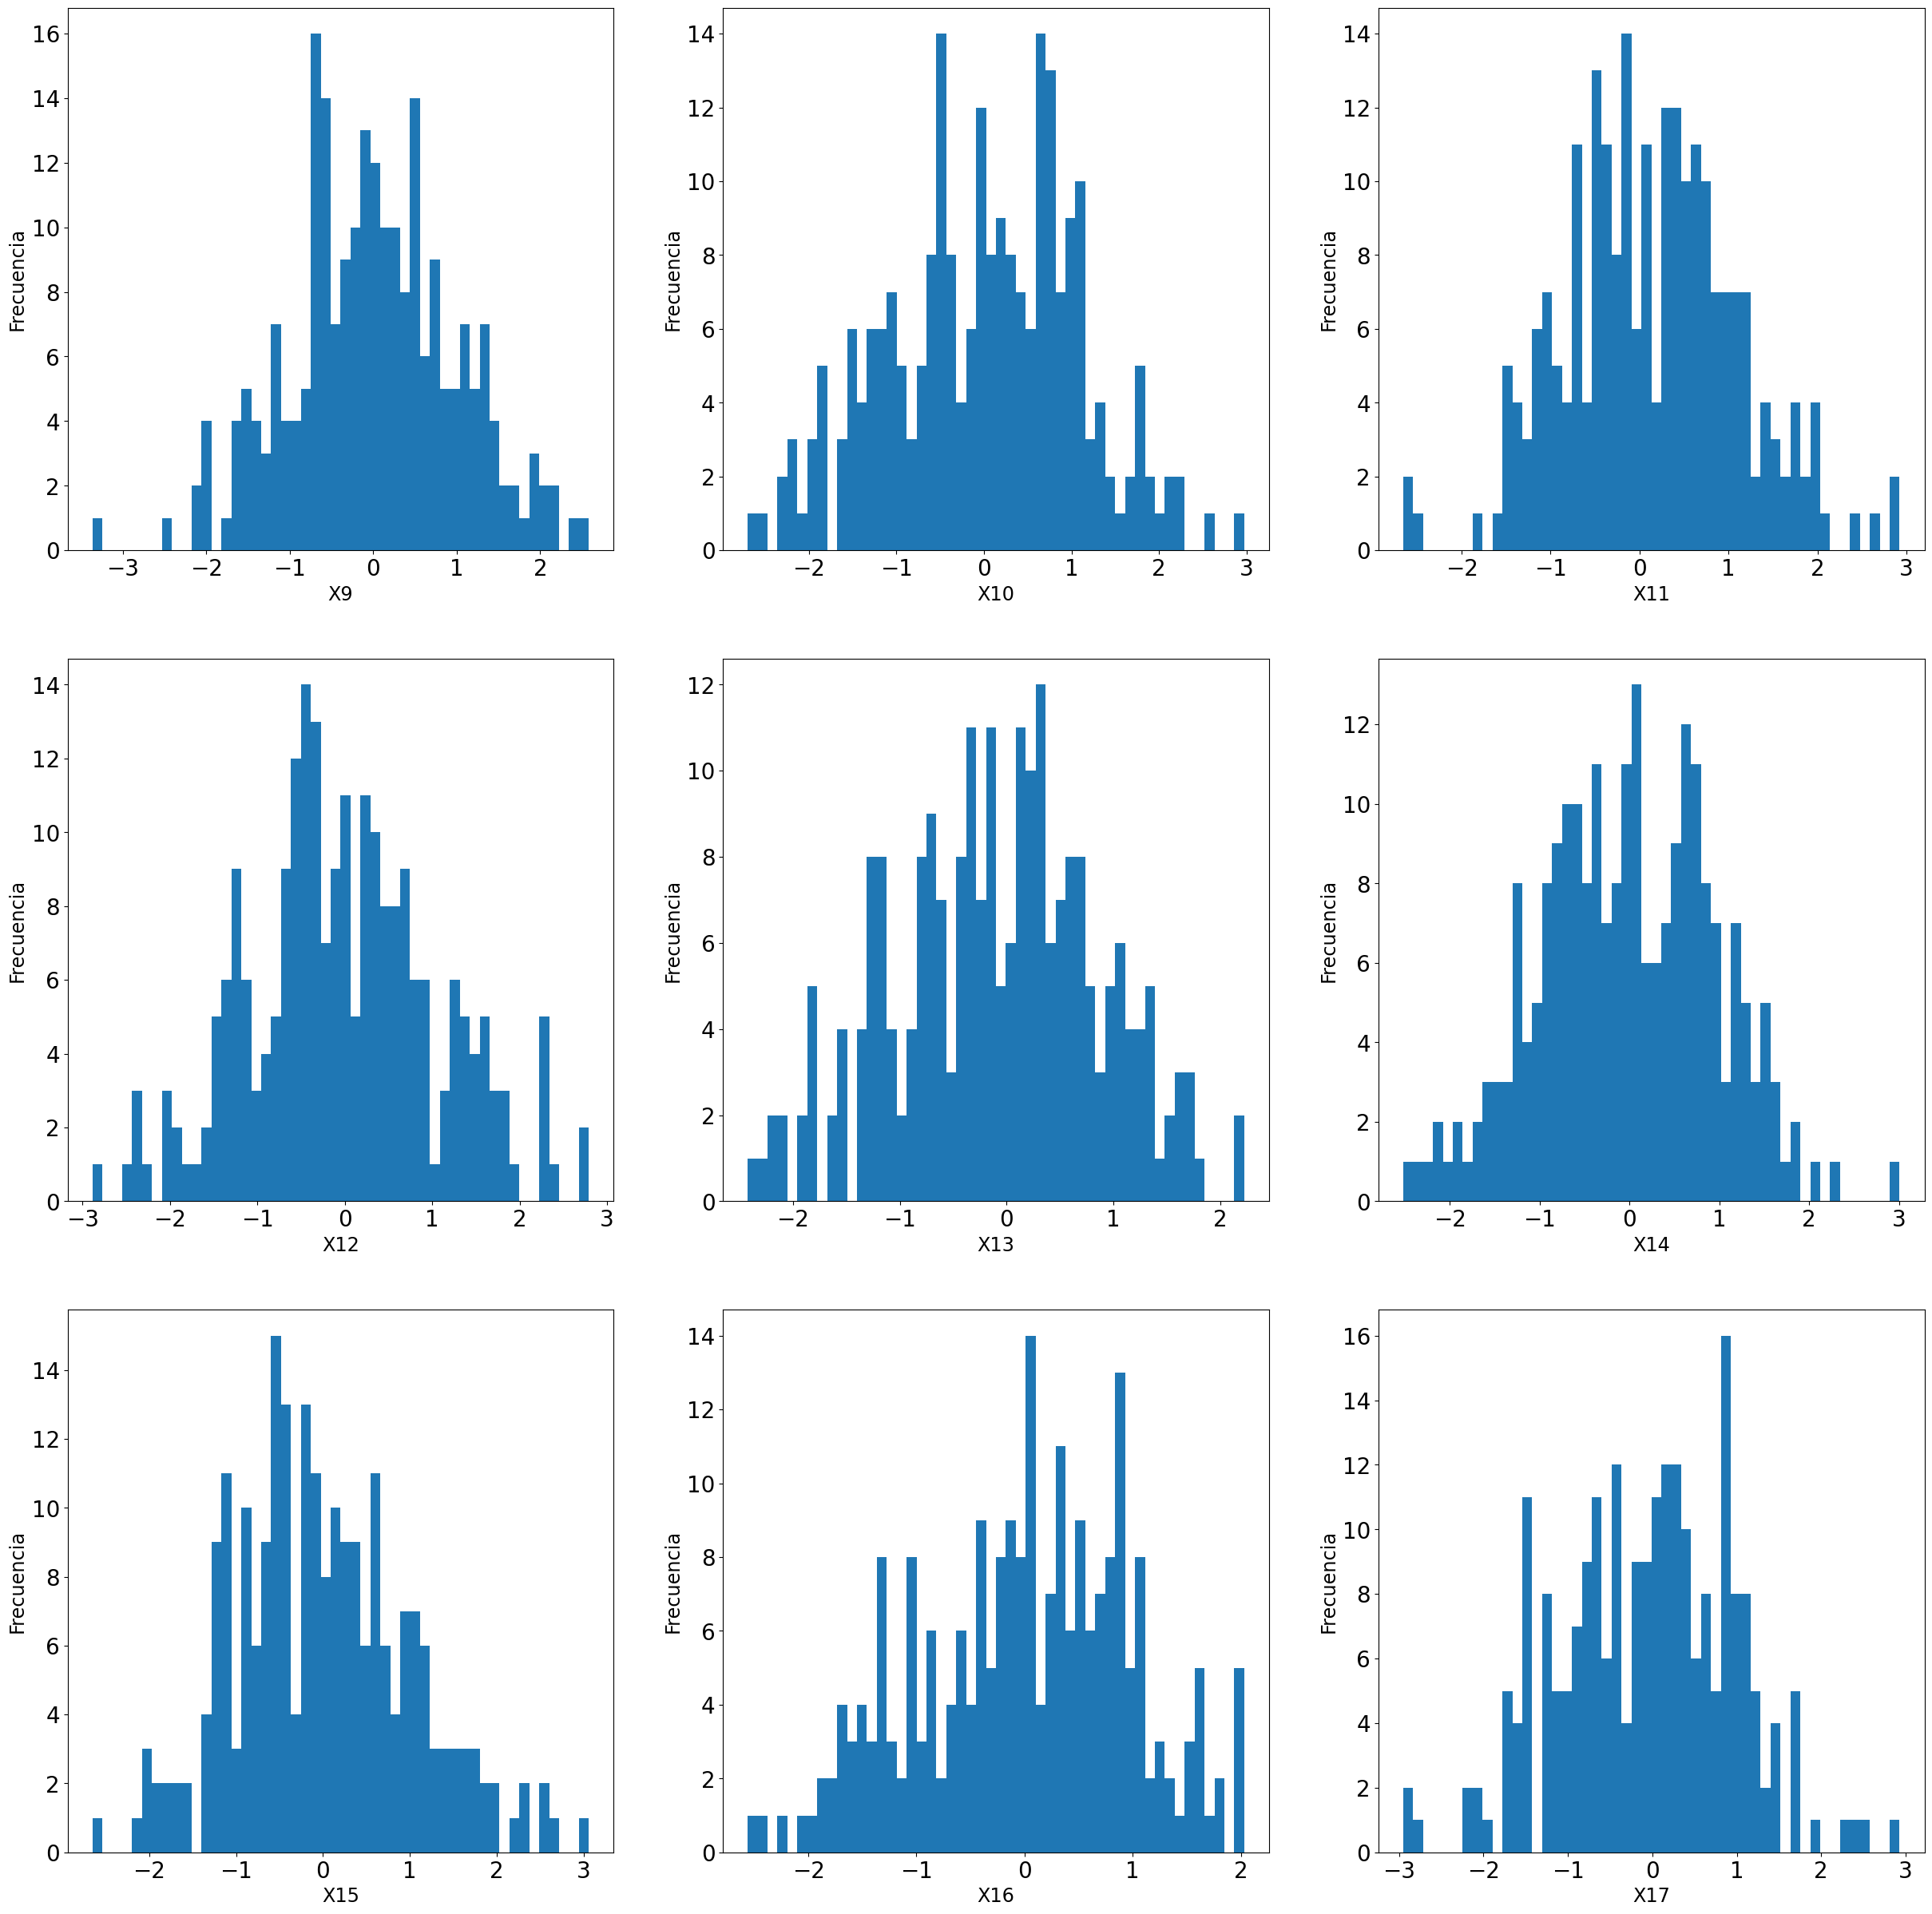

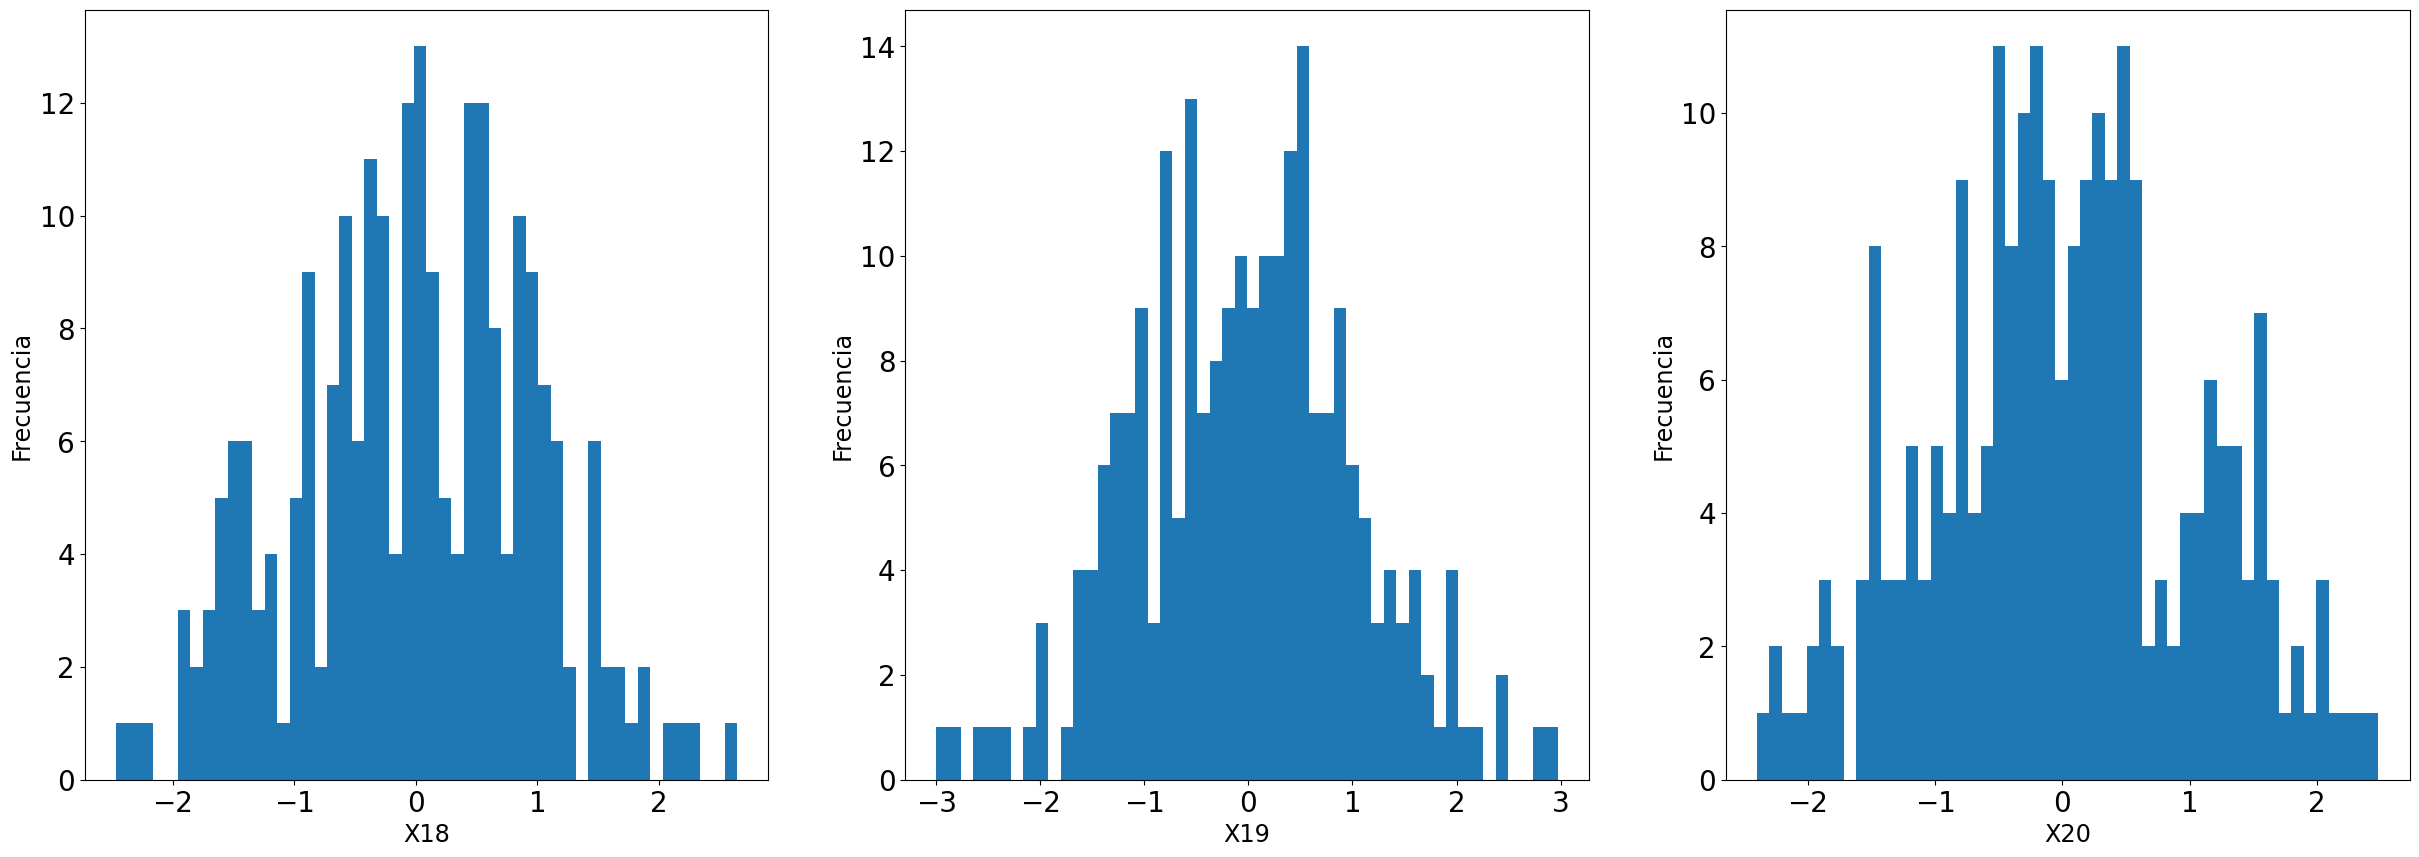

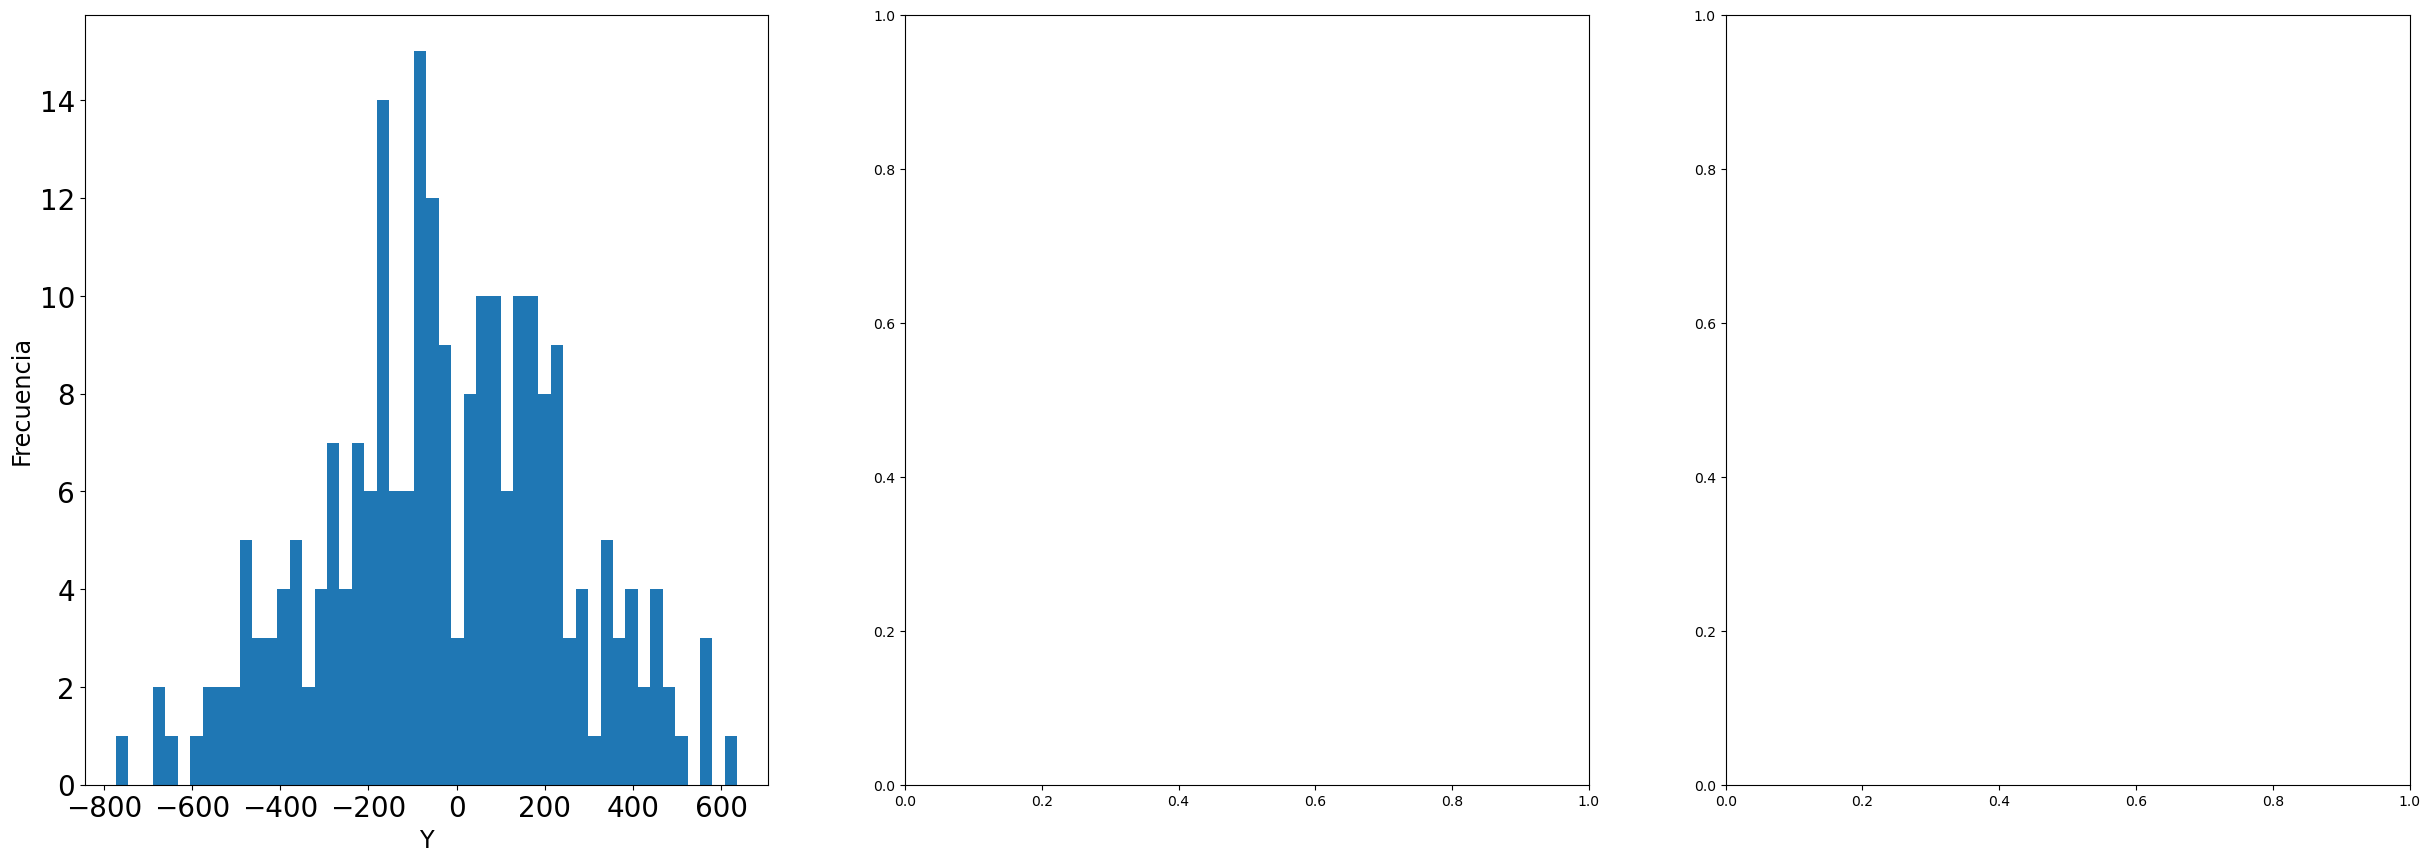

In [504]:
# A continuación, se realiza un análisis gráfico mediante histogramas de todas las variables. Para ello se emplea la librería pyplot.
import matplotlib.pyplot as plt

figura1 = plt.gcf()
figura1.set_size_inches(30,30) # Tamaño figura

for i in range(1,10):
    id = 330 + i
    plt.subplot(id)
    plt.hist(dataset['X'+str(i-1)], bins=50)
    plt.xlabel('X'+str(i-1), size='xx-large')
    plt.ylabel('Frecuencia', size='xx-large')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

plt.show()

figura2 = plt.gcf()
figura2.set_size_inches(30,30) # Tamaño figura

for i in range(1,10):
    id = 330 + i
    plt.subplot(id)
    plt.hist(dataset['X'+str(8+i)], bins=50)
    plt.xlabel('X'+str(8+i), size='xx-large')
    plt.ylabel('Frecuencia', size='xx-large')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

plt.show()

figura3 = plt.gcf()
figura3.set_size_inches(30,10) # Tamaño figura

for i in range(1,4):
    id = 130 + i
    plt.subplot(id)
    plt.hist(dataset['X'+str(17+i)], bins=50)
    plt.xlabel('X'+str(17+i), size='xx-large')
    plt.ylabel('Frecuencia', size='xx-large')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

plt.show()

figura4 = plt.gcf()
figura4.set_size_inches(30,10) # Tamaño figura
plt.subplot(131)
plt.hist(dataset['Y'], bins=50)
plt.xlabel('Y', size='xx-large')
plt.ylabel('Frecuencia', size='xx-large')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(132)
plt.subplot(133)
plt.show()

In [505]:
# 3) Divide el conjunto de datos en 200 observaciones para el entrenamiento y el resto para realizar la validación del método de regresión.

# Función para crear el conjunto de entrenamiento y el conjunto de validación
# 'dataset' es el dataframe y 'porcentaje_validacion' es la proporción en tanto por un 1 para el conjunto de validación.
def particiones(dataset, porcentaje_validacion):
    
    # 'int' se queda con la parte entera. Con len(dataset) se calcula la longitud de cada columna
    tamaño_validacion = int(round(len(dataset)*porcentaje_validacion,0))

    # Crea un array con los índices de 'dataset' dispuestos de forma aleatoria
    mezclar_indices = np.random.permutation(len(dataset))

    # Se queda con tantos índices del array anterior como datos debe haber en el conjunto de validación
    indices_validacion = mezclar_indices[:tamaño_validacion]

    # Los índices restantes son para los datos del dataset de entrenamiento
    indices_entrenamiento = mezclar_indices[tamaño_validacion:]

    # Se devuelven los dataset de entrenamiento y de test. 'iloc' saca filas
    return dataset.iloc[indices_entrenamiento], dataset.iloc[indices_validacion]

# Se llama a la función para crear el conjunto de entrenamiento (conj_entrenamiento) y el conjunto de validación (conj_validacion)
# Como se tienen 230 observaciones para cada variable, de las cuales se quieren destinar 200 para el entrenamiento, se debe tomar
# porcentaje_validacion = 0.13
conj_entrenamiento, conj_validacion = particiones(dataset, 0.13)

# Se comprueba que la partición es correcta calculando la cantidad de datos en cada conjunto
print('Cantidad teórica de datos en el conjunto de entrenamiento:', round(len(dataset)*0.87,0))
print('Cantidad de datos en el conjunto de entrenamiento creado:', len(conj_entrenamiento))
print('Cantidad teórica de datos en el conjunto de validación:', round(len(dataset)*0.13,0))
print('Cantidad de datos en el dataset de test creado:', len(conj_validacion))

Cantidad teórica de datos en el conjunto de entrenamiento: 200.0
Cantidad de datos en el conjunto de entrenamiento creado: 200
Cantidad teórica de datos en el conjunto de validación: 30.0
Cantidad de datos en el dataset de test creado: 30


In [506]:
# 4) Obtén un modelo de regresión lineal múltiple. ¿Son todas las variables predictoras significativas?

# Se usa el conjunto de entrenamiento creado en el apartado anterior, para construir el modelo de regresión lineal múltiple.
# No es necesario realizar imputación de datos porque, tal y como se ha visto previamente, se tienen 200 observaciones para cada variable predictora.
# Tampoco resulta necesario estandarizar las variables, puesto que estas son ya del mismo orden de magnitud.
# Entonces, se puede proceder directamente con la construcción del modelo. Para ello se emplea la clase LinearRegression.

from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Se crea objeto de la clase LinearRegression
respuesta = conj_entrenamiento['Y'] # Se extrae la variable respuesta del conjunto de entrenamiento
predictoras = conj_entrenamiento.drop('Y', axis=1) # Se extraen las variables predictoras del conjunto de entrenamiento
lm.fit(predictoras, respuesta) # Se realiza el ajuste

print('Intercepto:', lm.intercept_)
print('Componentes del vector normal del hiperplano;', lm.coef_)

Intercepto: 3.356561933754353
Componentes del vector normal del hiperplano; [64.56196289 85.03887062 68.12696928 74.61975077 25.59187561 15.10299593
 56.27150588 56.46632409 87.74869549 34.90087558 51.42834001  0.1295036
 92.35994483 53.21166607 50.7664688  95.6757462  25.34749452 67.54127473
 56.66877823 -0.23981744 -1.69010101]


In [507]:
# Nótese que los resultados anteriores son bastante parecidos a aquellos que se obtuvieron en el apartado 1 usando la función make_regression.
# Para evaluar si todas las variables predictoras son significativas se emplea la librería statsmodels.api.

import statsmodels.api as sm

predictoras = sm.add_constant(predictoras) # Se añade el parámetro correspondiente a la ordenada en el origen
lm1 = sm.OLS(respuesta, predictoras) # Se vuelve a construir el modelo empleando la librería statsmodels.api
lm1 = lm1.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1686.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          7.85e-193
Time:                        10:04:33   Log-Likelihood:                -875.75
No. Observations:                 200   AIC:                             1796.
Df Residuals:                     178   BIC:                             1868.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3566      1.512      2.220      0.0

In [512]:
# En general, todas las variables predictoras son significativas exceptuando a X11, X19 y X20. A estas tres les corresponde un p-valor > 0.05
#  o, equivalentemente, el intervalo de confianza al nivel [0.025-0.975] contiene el cero.
# Resulta interesante también notar que el coeficiente de determinación ajustado es bastante próximo a la unidad, lo cual sugiere que el ajuste
# es bueno.

In [514]:
# 5) Realiza una selección de variables mediante un algoritmo stepwise, donde en cada paso se elimine la variable predictora menos significativa
# atendiendo a su p-valor hasta que todas las variables del modelo sean significativas.

# Hacemos una selección de variables por etapas partiendo del modelo lm1 anterior. Se elimina la variable predictora con un p-valor mayor, X19, y se
# repite el ajuste, al que llamamos lm2.
predictoras2 = predictoras.drop('X19', axis=1)
lm2 = sm.OLS(respuesta, predictoras2)
lm2 = lm2.fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1780.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.86e-194
Time:                        10:04:39   Log-Likelihood:                -875.77
No. Observations:                 200   AIC:                             1794.
Df Residuals:                     179   BIC:                             1863.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3548      1.508      2.225      0.0

In [516]:
# A la vista de los resultados anteriores, X11 y X20, continúan sin ser significativas. Se procede eliminando X11, que presenta un mayor p-valor.
# Nótese que el F-statistic presenta un valor superior a aquel del caso anterior, lo cual indica que el modelo lm2 es más significativo que el lm1. 

predictoras3 = predictoras2.drop('X11', axis=1)
lm3 = sm.OLS(respuesta, predictoras3)
lm3 = lm3.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1885.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          4.24e-196
Time:                        10:04:42   Log-Likelihood:                -875.77
No. Observations:                 200   AIC:                             1792.
Df Residuals:                     180   BIC:                             1858.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3730      1.486      2.269      0.0

In [518]:
# lm3 es un modelo más significativo que lm2, pero la variable X20 presenta un p-valor ligeramente superior a 0.05, por lo que se repite el proceso
# una última vez descartando dicha variable.

predictoras4 = predictoras3.drop('X20', axis=1)
lm4 = sm.OLS(respuesta, predictoras4)
lm4 = lm4.fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1985.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.83e-197
Time:                        10:04:44   Log-Likelihood:                -876.52
No. Observations:                 200   AIC:                             1791.
Df Residuals:                     181   BIC:                             1854.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3408      1.487      2.246      0.0

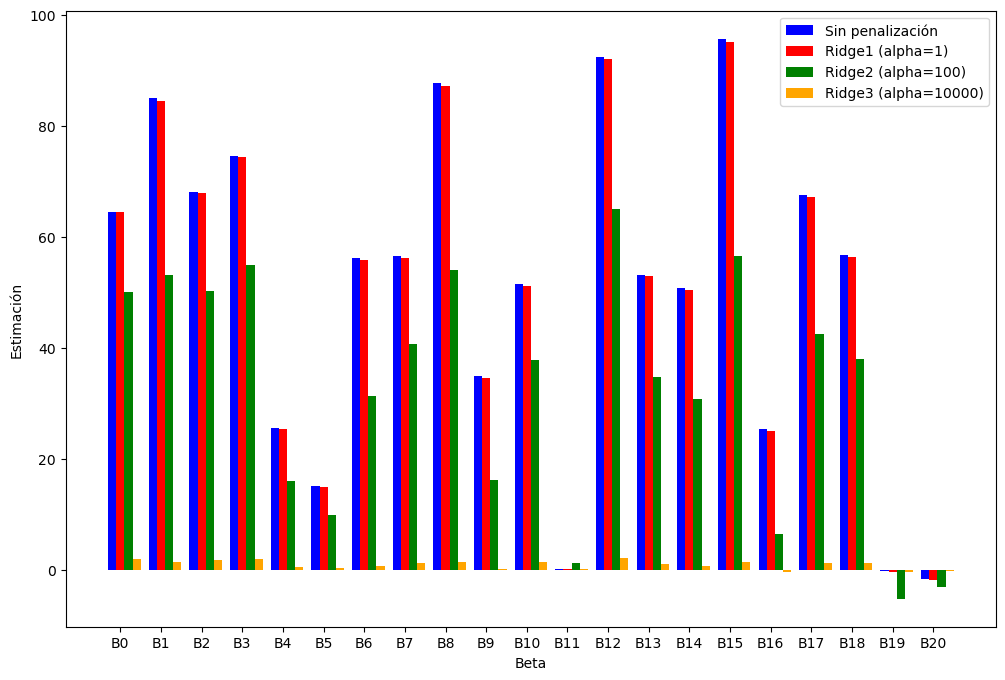

In [520]:
# lm4 es el modelo de regresión lineal múltiple, para el cual todas las variables predictoras son significativas, obtenido mediante una selección de 
# variables 'stepwise'.

# 6) Realiza una regresión de tipo Ridge. Prueba con distintos valores de alpha.

from sklearn.linear_model import Ridge

# Se crean varios objetos de la clase Ridge con distintos valores de 'alpha'.
ridge1 = Ridge(alpha=1, solver='auto')
ridge2 = Ridge(alpha=100, solver='auto')
ridge3 = Ridge(alpha=1e4, solver='auto')

# Se extraen las variables predictoras y la variables respuesta del conjunto de entrenamiento creado en el apartado 3.
respuesta = conj_entrenamiento['Y']
predictoras = conj_entrenamiento.drop('Y', axis=1)

# Se realiza la regresión tipo Ridge
ridge1.fit(predictoras, respuesta)
ridge2.fit(predictoras, respuesta)
ridge3.fit(predictoras, respuesta)

# Se comparan los estimaciones de los coeficientes para cada regresión Ridge junto a las estimaciones del modelo de regresión sin penalización, lm, 
# empleando un diagrama de barras. Para ello se utiliza la librería 'pyplot'.
import matplotlib.pyplot as plt

ancho= 0.4 # Ancho barras
r = np.array([x*2 for x in range(len(lm.coef_))]) # Array [0, 2, 4, ..., 2*len(lm.coef_)-2] para ubicar las barras en el diagrama
r1 = [x + ancho for x in r] # Ubicación de las barras correspondientes a la regresión ridge1
r2 = [x + ancho for x in r1] # Ubicación de las barras correspondientes a la regresión ridge2
r3 = [x + ancho for x in r2] # Ubicación de las barras correspondientes a la regresión ridge2
fig = plt.figure(figsize=(12,8))
plt.bar(r, lm.coef_, color='blue', width=ancho, label='Sin penalización')
plt.bar(r1, ridge1.coef_, color='red', width=ancho, label='Ridge1 (alpha=1)')
plt.bar(r2, ridge2.coef_, color='green', width=ancho, label='Ridge2 (alpha=100)')
plt.bar(r3, ridge3.coef_, color='orange', width=ancho, label='Ridge3 (alpha=10000)')
plt.xticks([x*2 + ancho for x in range(len(lm.coef_))],
          ['B'+str(i) for i in range(0,len(lm.coef_))])
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Estimación')
plt.show(fig)

In [522]:
# El diagrama de barras pone de manifiesto que los resultados con alpha=1 son prácticamente idénticos que aquellos que se obtienen sin penalización.
# Para alpha=10000, los coeficientes se hacen muy pequeños. Resultan interesantes los resultados para alpha=100. Aunque la regresión LASSO suele ser
# más fiable a la hora de seleccionar las variables significativas, no es casualidad que los valores más pequeños de los coeficientes para alpha=100,
# se obtengan para X11, X19 y X20. Estas son justamente las variables que se han calificado como no significativas en el apartado 4.

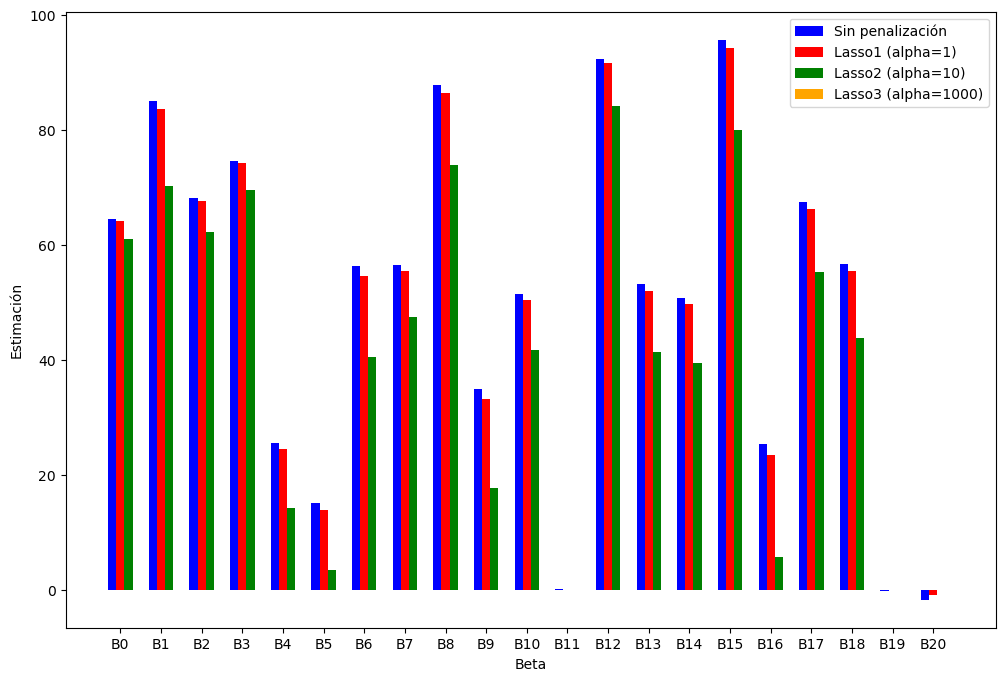

In [524]:
# 7) Realiza una regresión de tipo LASSO. Prueba distintos valores de 'alpha'.

from sklearn.linear_model import Lasso

# Se crean varios objetos de la clase Ridge con distintos valores de 'alpha'.
lasso1 = Lasso(alpha=1)
lasso2 = Lasso(alpha=10)
lasso3 = Lasso(alpha=1000)

# Se realiza la regresión tipo LASSO
lasso1.fit(predictoras, respuesta)
lasso2.fit(predictoras, respuesta)
lasso3.fit(predictoras, respuesta)

# Se comparan los estimaciones de los coeficientes para cada regresión LASSO junto a las estimaciones del modelo de regresión sin penalización, lm, 
# empleando un diagrama de barras.
ancho= 0.4 # Ancho barras
r = np.array([x*2 for x in range(len(lm.coef_))]) # Array [0, 2, 4, ..., 2*len(lm.coef_)-2] para ubicar las barras en el diagrama
r1 = [x + ancho for x in r] # Ubicación de las barras correspondientes a la regresión lasso1
r2 = [x + ancho for x in r1] # Ubicación de las barras correspondientes a la regresión lasso2
r3 = [x + ancho for x in r2] # Ubicación de las barras correspondientes a la regresión lasso3
fig = plt.figure(figsize=(12,8))
plt.bar(r, lm.coef_, color='blue', width=ancho, label='Sin penalización')
plt.bar(r1, lasso1.coef_, color='red', width=ancho, label='Lasso1 (alpha=1)')
plt.bar(r2, lasso2.coef_, color='green', width=ancho, label='Lasso2 (alpha=10)')
plt.bar(r3, lasso3.coef_, color='orange', width=ancho, label='Lasso3 (alpha=1000)')
plt.xticks([x*2 + ancho for x in range(len(lm.coef_))],
          ['B'+str(i) for i in range(0,len(lm.coef_))])
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Estimación')
plt.show(fig)

In [526]:
# Se observa que para alpha=1, la penalización apenas tiene efecto y las estimaciones son prácticamente las mismas que aquellas que se obtienen
# con el modelo sin penalizar. Para alpha=10, los coeficientes correspondientes a X11, X19 y X20 van a cero, poniendo en evidencia que apenas
# son significativas. De hecho, para alpha=1, los coeficientes de X11 y X19 ya son cero. Finalmente, para alpha=1000, todos los coeficientes valen
# cero.

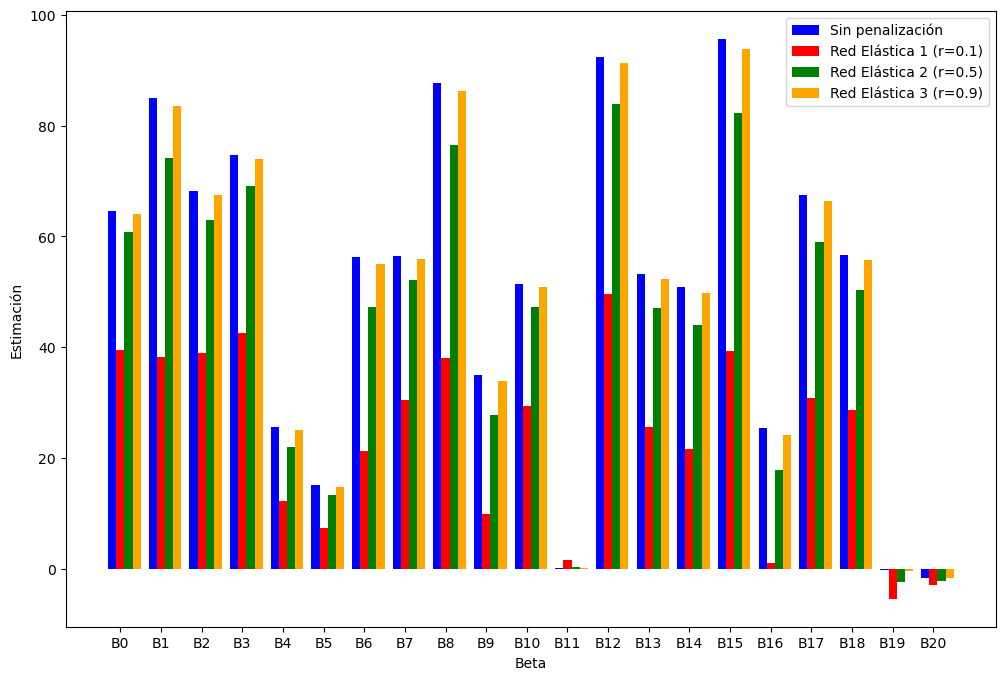

In [528]:
# 8) Realiza una regresión mediante la Red Elástica. Prueba distinto valores de 'r' y obtén el valor de óptimo de este y de 'alpha' mediante
# validación cruzada.

# Para llevar a cabo una regresión de Red Elástica se crea un objeto de la clase ElasticNetCV de la librería 'sklearn'.
from sklearn.linear_model import ElasticNetCV

# Se crean varios objetos de la clase ElasticNetCV con distintos valores de 'r'. Se efectúan 10 particiones de los datos en la validación cruzada.
# Mediante la validación cruzada se determina el valor óptimo del hiperparámetro 'alpha' para cada valor de 'r'.
red1 = ElasticNetCV(cv=10, l1_ratio=0.1)
red2 = ElasticNetCV(cv=10, l1_ratio=0.5)
red3 = ElasticNetCV(cv=10, l1_ratio=0.9)

# Se realiza la regresión de Red Elástica
red1.fit(predictoras, respuesta)
red2.fit(predictoras, respuesta)
red3.fit(predictoras, respuesta)

# Se comparan los estimaciones de los coeficientes para cada regresión Red Elástica junto a las estimaciones del modelo de regresión sin penalización 
# empleando un diagrama de barras.
ancho= 0.4 # Ancho barras
r = np.array([x*2 for x in range(len(lm.coef_))]) # Array [0, 2, 4, ..., 2*len(lm.coef_)-2] para ubicar las barras en el diagrama
r1 = [x + ancho for x in r] # Ubicación de las barras correspondientes a la regresión lasso1
r2 = [x + ancho for x in r1] # Ubicación de las barras correspondientes a la regresión lasso2
r3 = [x + ancho for x in r2] # Ubicación de las barras correspondientes a la regresión lasso3
fig = plt.figure(figsize=(12,8))
plt.bar(r, lm.coef_, color='blue', width=ancho, label='Sin penalización')
plt.bar(r1, red1.coef_, color='red', width=ancho, label='Red Elástica 1 (r=0.1)')
plt.bar(r2, red2.coef_, color='green', width=ancho, label='Red Elástica 2 (r=0.5)')
plt.bar(r3, red3.coef_, color='orange', width=ancho, label='Red Elástica 3 (r=0.9)')
plt.xticks([x*2 + ancho for x in range(len(lm.coef_))],
          ['B'+str(i) for i in range(0,len(lm.coef_))])
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Estimación')
plt.show(fig)

In [530]:
# Del gráfico anterior se observa que para r=0.1, valor para le cual domina la penalización de tipo Ridge, no se puede realizar una selección de 
# variables puesto que muchas de las estimaciones de beta se encogen considerablemente. 
# Para r=0.5 se tiene un compromiso total entre las penalizaciones de tipo Ridge y de tipo LASSO.
# Finalmente, para r=0.9 domina la penalización de tipo LASSO y se anula la estimación del coeficiente de X11. Ello permite calificarla como variable
# no significativa.

# A continuación se pasan varios valores del hiperparámetro 'r' como lista en la creación del objeto de la clase ElasticNetCV. Luego, se selecciona
# aquel que minimiza el error de test en la validación cruzada.
red_mejor = ElasticNetCV(cv=10, l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
red_mejor.fit(predictoras, respuesta)
print(red_mejor.l1_ratio_)

0.9


In [532]:
# El mejor modelo de red elástica atendiendo al criterio anterior se obtiene para r=0.9, es decir cuando domina la penalización de tipo LASSO sobre
# la penalización de tipo Ridge.

In [534]:
# 9) Comprueba con la muestra de validación con cuál de los modelos se obtiene un menor error cuadrático medio.

# Se tienen el modelo original; 'lm', el modelo con selección de variables 'stepwise'; 'lm4', varios modelos de regresión Ridge; 'ridge1', 'ridge2'
#  y 'ridge3', varios modelos de regresión LASSO; 'lasso1','lasso2' y 'lasso3'; y un modelo de Red Elástica; 'red3'. 
# Primero se selecciona de cada uno de los modelos Ridge y de cada uno de los modelos LASSO el mejor atendiendo al error cuadrático medio con el
# conjunto de validación. Para calcular el error cuadrático medio se emplea la función 'mean_squared_error' de la librería 'sklearn'.

from sklearn.metrics import mean_squared_error as mse

test_y = conj_validacion['Y'] # Se extrae la variable respuesta del conjunto de validación
test_x = conj_validacion.drop('Y', axis=1) # Se extraen las variables predictoras del conjunto de validación

y_predict_ridge1 = ridge1.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión Ridge 1
rmse_ridge1 = mse(y_predict_ridge1,test_y) # Error cuadrático medio para el modelo de regresión Ridge 1

y_predict_ridge2 = ridge2.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión Ridge 1
rmse_ridge2 = mse(y_predict_ridge2,test_y) # Error cuadrático medio para el modelo de regresión Ridge 1

y_predict_ridge3 = ridge3.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión Ridge 3
rmse_ridge3 = mse(y_predict_ridge3,test_y) # Error cuadrático medio para el modelo de regresión Ridge 3

print('Ridge1:', rmse_ridge1)
print('Ridge2:', rmse_ridge2)
print('Ridge3:', rmse_ridge3)

Ridge1: 342.90329166276405
Ridge2: 9386.15911479789
Ridge3: 71905.67058659493


In [536]:
# El mejor modelo con penalización Ridge es aquel con alpha=1, es decir aquel para el cual la penalización es la menor.
# Se repite el procedimiento para los tres modelos de regresión LASSO.

y_predict_lasso1 = lasso1.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión LASSO 1
rmse_lasso1 = mse(y_predict_lasso1,test_y) # Error cuadrático medio para el modelo de regresión LASSO 1

y_predict_lasso2 = lasso2.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión LASSO 1
rmse_lasso2 = mse(y_predict_lasso2,test_y) # Error cuadrático medio para el modelo de regresión LASSO 1

y_predict_lasso3 = lasso3.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión LASSO 3
rmse_lasso3 = mse(y_predict_lasso3,test_y) # Error cuadrático medio para el modelo de regresión LASSO 3

print('LASSO 1:', rmse_lasso1)
print('LASSO 2:', rmse_lasso2)
print('LASSO 3:', rmse_lasso3)

LASSO 1: 369.17817648322045
LASSO 2: 2895.756062755298
LASSO 3: 74852.09162471787


In [538]:
# Sucede igual que con los modelos Ridge, el mejor modelo de regresión LASSO es aquel para el cual la penalización es menor, el modelo lasso1.
# Con todo ello, ya podemos comparar cinco modelos; el modelo original (lm), el modelo con selección de variables 'stepwise' (lm4), el modelo Ridge 
# (ridge1), el modelo LASSO (lasso1) y el modelo de Red Elástica (red3). Se comparan los cinco modelos mediante un diagrama de barras en los que la
# altura de cada barra indica el correspondiente error cuadrático medio con el conjunto de validación.

y_predict_original = lm.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión original
rmse_original = mse(y_predict_original,test_y) # Error cuadrático medio para el modelo de regresión original

y_predict_red3 = red3.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión de Red Elástica
rmse_red3 = mse(y_predict_red3,test_y) # Error cuadrático medio para el modelo de regresión de Red Elástica

# Se repite la regresión 'stepwise' con la clase LinearRegression
predictoras = conj_entrenamiento.drop('Y', axis=1)
predictoras = predictoras.drop('X11', axis=1)
predictoras = predictoras.drop('X19', axis=1)
predictoras = predictoras.drop('X20', axis=1)
lm4 = LinearRegression()
lm4.fit(predictoras, respuesta)

# Para el modelo de 'stepwise' hay que eliminar las variables X11, X19 y X20 del conjunto de validación.
test_x = test_x.drop('X11', axis=1)
test_x = test_x.drop('X19', axis=1)
test_x = test_x.drop('X20', axis=1)

y_predict_stepwise = lm4.predict(test_x) # Valor proporcionado por el ajuste del modelo de regresión 'stepwise'
rmse_stepwise = mse(y_predict_stepwise,test_y) # Error cuadrático medio para el modelo de regresión 'stepwise'

rmse = [rmse_original, rmse_stepwise, rmse_ridge1, rmse_lasso1, rmse_red3] # Se almacenan todos los errores cuadráticos medios en una lista

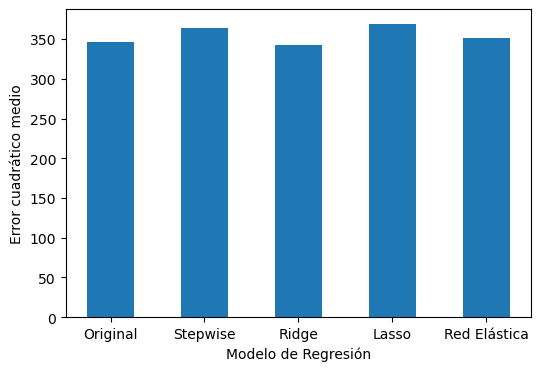

In [540]:
fig = plt.figure(figsize=(6,4))
plt.bar([0,2,4,6,8],rmse, width=1)
plt.xticks([0,2,4,6,8], ['Original', 'Stepwise', 'Ridge', 'Lasso', 'Red Elástica'])
plt.xlabel('Modelo de Regresión')
plt.ylabel('Error cuadrático medio')
plt.show()

In [542]:
modelo = ['Original', 'Stepwise', 'Ridge', 'Lasso', 'Red Elástica']
for i in range(5):
    print('Error cuadrático medio del Modelo',modelo[i],':',rmse[i])

Error cuadrático medio del Modelo Original : 346.8801042574698
Error cuadrático medio del Modelo Stepwise : 364.31816000781623
Error cuadrático medio del Modelo Ridge : 342.90329166276405
Error cuadrático medio del Modelo Lasso : 369.17817648322045
Error cuadrático medio del Modelo Red Elástica : 351.6455495289374


In [544]:
# Los resultados son bastante parejos, pero atendiendo al error cuadrático medio, el mejor modelo de regresión es aquel que se obtiene mediante
# Ridge y el peor modelo es el modelo de regresión LASSO. Aún así, conviene mecionar que se ha repetido la actividad varias veces y se ha 
# visto que los resultados para determinar el mejor modelo dependen de los datos que se destinan para el entrenamiento y los datos que se destinan
# para la validación. También se ha visto que el error cuadrático medio obtenido es menor cuanto menor es el argumento 'noise' de la función
# make_regression. Como para este caso, noise = 20, los errores son mucho menores que los que han obtenido otros compañeros.